# Lab 1: Regression

Welcome to the advanced Machine Learning Course.

The objective of this lab session is to code a few regression algorithms and to apply them to synthetic and real datasets.

Please put **"ML - MDS - TD1"** in the mail subject or I might lose your work (which means 0) and send it to pierre.houdouin@centralesupelec.fr

Please label your notebook **"L1_familyname1_familyname2.ipynb"** or I might lose your work (which means 0).

We begin with the standard imports:

In [95]:
%matplotlib inline
import matplotlib.pyplot as plt
#import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

## Simple Linear Regression

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = \beta x + b
$$
where $\beta$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

Consider the following data, which is scattered about a line with a slope of 2 and an intercept of -5:

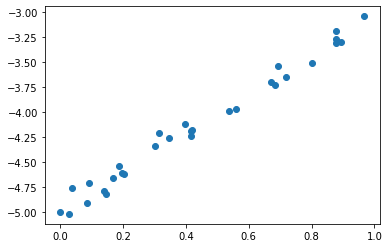

In [96]:
rng = np.random.RandomState(1)
x =  rng.rand(30)
y = 2 * x - 5 + 0.1* rng.randn(30)
plt.scatter(x, y);

Fill in the MultivariateLinearRegression class whose method fit takes a matrix $X$ and an array $y$ as input and returns an array of coefficients

In [97]:
class MultivariateLinearRegression():
    # Class for linear regression solving least-squares:

    def __init__(self):
        self.coef_ = None
        
    def fit(self, X, y):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """
        # TODO :
        # Create a (num_samples, num_features+1) np.array X_aug whose first column 
        # is a column of all ones (so as to fit an intercept).
        # Reshape x to be a column vector


        num_samples, num_features= X.shape
        X_aug = np.ones((num_samples, num_features+1))  # Initialize with ones
        X_aug[:, 1:] = X  # Set the remaining columns to the features in X

        # Update self.coef_
        # Calculate the coefficients using the normal equation
        # coef = (X^T * X)^{-1} * X^T * y
        self.coef_ = np.linalg.inv(X_aug.T.dot(X_aug)).dot(X_aug.T).dot(y)

        
    def predict(self, X):
        """ Make predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions
        """
        # TODO
        num_samples, num_features= X.shape
        y_pred = [self.coef_[0]]*num_samples +  np.dot(X, self.coef_[1:])
        return y_pred


Try your model on the data and plot the data points and the fitted line:

In [98]:
ML = MultivariateLinearRegression()
ML.fit(x.reshape(-1, 1), y)
y_pred = ML.predict(x.reshape(-1, 1))

Print the scope and the intercept:

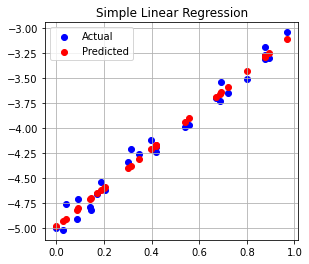

In [99]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Actual')
plt.scatter(x, y_pred, color='red', label='Predicted')
plt.title('Simple Linear Regression')
plt.grid(True)
plt.legend()

In [100]:
print("Model slope:  ", ML.coef_[1])
print("Model intercept:",ML.coef_[0])

Model slope:   1.9292055341290568
Model intercept: -4.976046835178196


We see that the results are very close to the inputs, as we might hope.

Of course our linear regression estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building a toy example:

In [101]:
rng = np.random.RandomState(1)
X = 3 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model = MultivariateLinearRegression()

model.fit(X, y)
print(model.coef_) # perfect fitting

[ 0.5  1.5 -2.   1. ]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.

## Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to *basis functions*.

The idea is to take our multidimensional linear model:
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + \cdots
$$
and build the $x_1, x_2, x_3,$ and so on, from our single-dimensional input $x$.
That is, we let $x_n = f_n(x)$, where $f_n()$ is some function that transforms our data.

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression:
$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \cdots
$$
Notice that this is *still a linear model*—the linearity refers to the fact that the coefficients $a_n$ never multiply or divide each other.
What we have effectively done is taken our one-dimensional $x$ values and projected them into a higher dimension, so that a linear fit can fit more complicated relationships between $x$ and $y$.

### Polynomial basis functions

This polynomial projection is useful enough that it is built into Scikit-Learn, using the ``PolynomialFeatures`` transformer:

In [102]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(5, include_bias=False) # with or without intercept
poly.fit_transform(x[:, None])

array([[   2.,    4.,    8.,   16.,   32.],
       [   3.,    9.,   27.,   81.,  243.],
       [   4.,   16.,   64.,  256., 1024.]])

We see here that the transformer has converted our one-dimensional array into a three-dimensional array by taking the exponent of each value.
This new, higher-dimensional data representation can then be plugged into a linear regression

With this transform, we can use the linear model to fit much more complicated relationships between $x$ and $y$. 
For example, here is a sine wave with noise:

In [103]:
rng = np.random.RandomState(1)
x = rng.rand(50)
y = 2 * np.sin(1.8*np.pi*x) + 0.1 * rng.randn(50)
model = MultivariateLinearRegression()
model.fit(poly.fit_transform(x[:, None]), y)
y_poly_pred=model.predict(poly.fit_transform(x[:, None]))
print(model.coef_) # perfect fitting

[-4.07463346e-02  1.13922103e+01  7.85013884e+00 -1.17585572e+02
  1.49862889e+02 -5.25848253e+01]


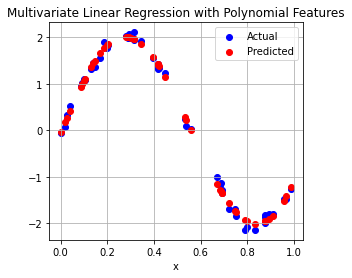

In [104]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Actual')
plt.scatter(x, y_poly_pred, color='red', label='Predicted')
plt.xlabel('x')
plt.grid(True)
plt.title('Multivariate Linear Regression with Polynomial Features')
plt.legend()

Try with different maximum degrees. Our linear model can provide an excellent fit to this non-linear data!

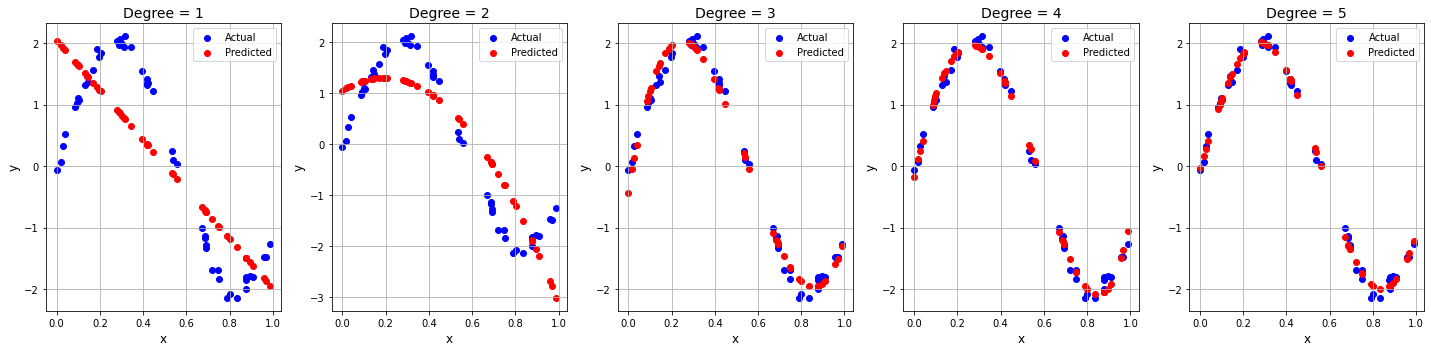

In [105]:
degrees=[1, 2, 3, 4, 5]
fig, axes = plt.subplots(1, len(degrees), figsize=(20, 5)) 
def plot_poly(degrees, axes):
    # Iterate over the alpha values and corresponding axes
    for ax, d in zip(axes.flat, degrees):
        poly = PolynomialFeatures(d, include_bias=False) # with or without intercept
        poly.fit_transform(x[:, None])
        model = MultivariateLinearRegression()
        model.fit(poly.fit_transform(x[:, None]), y)
        y_pred=model.predict(poly.fit_transform(x[:, None]))
        
        # Plot actual vs predicted data
        ax.scatter(x, y, color='blue', label='Actual')
        ax.scatter(x, y_pred, color='red', label='Predicted')
        
        # Customize the subplot
        ax.set_title(f'Degree = {d}', fontsize=14)
        ax.set_xlabel('x', fontsize=12)
        ax.set_ylabel('y', fontsize=12)
        ax.grid(True)
        ax.legend()

plot_poly(degrees, axes)
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

**Bonus:** How can we avoid overfitting?

**Answer:** We can add a penalty term to the loss function and use a ridge or lasso regression

## Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to over-fitting.

With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data.
We can see the reason for this if we plot the coefficients of the Gaussian bases with respect to their locations:

### Ridge regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as *ridge regression* or $L_2$ *regularization*, sometimes also called *Tikhonov regularization*.
This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be 
$$
P = \alpha\sum_{i=1}^n \beta_i^2
$$
where $\alpha$ is a free parameter that controls the strength of the penalty.

 Fill in the following class:

In [106]:
class RidgeRegularization():
    # Class for ridge regression with closed form equation:

    def __init__(self, alpha):
        self.coef_ = None
        self.alpha_ = alpha
        
    def fit(self, X, y):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """
        # TODO:
        # Create a (num_samples, num_features+1) np.array X_aug whose first column 
        # is a column of all ones (so as to fit an intercept).
        num_samples, num_features= X.shape
        X_aug = np.ones((num_samples, num_features+1))  # Initialize with ones
        X_aug[:, 1:] = X  # Set the remaining columns to the features in X

        # Update self.coef_
        X_transpose = X_aug.T
        self.coef_ = np.linalg.inv(X_transpose.dot(X_aug)).dot(X_transpose).dot(y)
        # Calculate the coefficients using the normal equation
        # coef = (X^T * X)^{-1} * X^T * y
       
        
        # Update self.coef_ adding the shrinkage ridge term
        self.coef_ = np.linalg.inv(X_transpose.dot(X_aug) + self.alpha_*np.eye(num_features+1)).dot(X_transpose).dot(y)
        
    def predict(self, X):
        """ Make predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictionslambda
        """
        num_samples, num_features= X.shape
        y_pred = [self.coef_[0]]*num_samples +  np.dot(X, self.coef_[1:])
        return y_pred
        

Try the model in our data. Plot the coefficients of the regression.

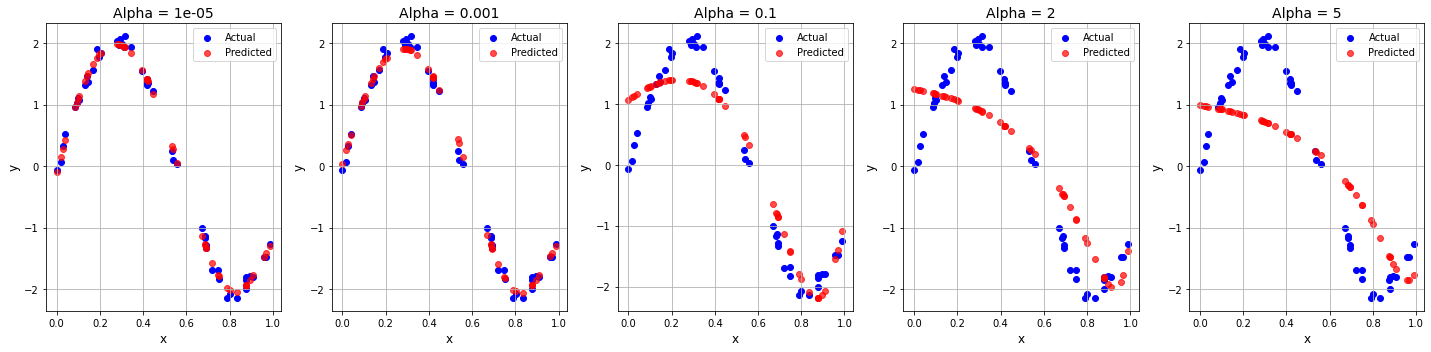

In [107]:
poly = PolynomialFeatures(degree=25, include_bias=False)
x_poly = poly.fit_transform(x[:, None]) 
alphas = [1e-5, 1e-3, 1e-1, 2, 5]  # Different alpha values
# Create subplots
fig, axes = plt.subplots(1, len(alphas), figsize=(20, 5)) 

def plot_Ridge(alphas, axes):
    # Iterate over the alpha values and corresponding axes
    for ax, alpha in zip(axes.flat, alphas):
        modelR = RidgeRegularization(alpha)
        modelR.fit(x_poly, y)
        y_pred = modelR.predict(x_poly)
        
        # Plot actual vs predicted data
        ax.scatter(x, y, color='blue', label='Actual')
        ax.scatter(x, y_pred, color='red', label='Predicted', alpha=0.7)
        
        # Customize the subplot
        ax.set_title(f'Alpha = {alpha}', fontsize=14)
        ax.set_xlabel('x', fontsize=12)
        ax.set_ylabel('y', fontsize=12)
        ax.grid(True)
        ax.legend()

# Call the plotting function
plot_Ridge(alphas, axes)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [108]:
modelR = RidgeRegularization(1e-5)
modelR.fit(x_poly, y)
y_pred = modelR.predict(x_poly)
print(modelR.coef_)

[-1.02248252e-01  1.40587718e+01 -1.68421712e+01 -3.02113901e+01
  1.38879907e+01  2.56018072e+01  1.18766490e+01 -4.70002296e+00
 -1.32049559e+01 -1.28155400e+01 -6.95156216e+00  4.91543005e-01
  6.69473975e+00  1.02050279e+01  1.06943086e+01  8.58137177e+00
  4.68744767e+00 -2.10592941e-02 -4.60100352e+00 -8.22902269e+00
 -1.02464481e+01 -1.01703350e+01 -7.68417032e+00 -2.61780725e+00
  5.07706790e+00  1.53520306e+01]


The $\alpha$ parameter is essentially a knob controlling the complexity of the resulting model.
In the limit $\alpha \to 0$, we recover the standard linear regression result; in the limit $\alpha \to \infty$, all model responses will be suppressed.

**Bonus:** How can we choose the $\alpha$ parameter?

**Answer:** We can use a k-Fold Cross-Validation for tuning the hyperparameter 𝛼

### Lasso regression ($L_1$ Regularization)

Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients: $$
P = \alpha\sum_{i=1}^n |\beta_i|
$$ Though this is conceptually very similar to ridge regression, the results can differ surprisingly: for example, due to geometric reasons lasso regression tends to favor sparse models where possible: that is, it preferentially sets model coefficients to exactly zero.

We can see this behavior in duplicating the ridge regression figure, but using L1-normalized coefficients.

First, fill in the following class:

In [109]:
class LassoRegularization():
    # Class for lasso regression with soft thresholding:

    def __init__(self, alpha, learning_rate=0.01, iterations=1000):
        self.coef_ = None
        self.alpha = alpha
        self.learning_rate_ = learning_rate
        self.iterations_ = iterations
        
    def soft_threshold(self, beta):
        """ Soft threshold function"""
        return np.sign(beta)*np.maximum(np.abs(beta)-self.alpha*self.learning_rate_, 0)
        
    def fit(self, X, y):
        """ Fit the data (X, y).
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """
        # TODO:
        # Create a (num_samples, num_features+1) np.array X_aug whose first column
        num_samples, num_features = X.shape
        X_aug = np.ones((num_samples, num_features + 1))  # Initialize with ones
        X_aug[:, 1:] = X  # Set the remaining columns to the features in X
        self.coef_ = np.zeros(num_features + 1)
        for _ in range(self.iterations_):
            self.coef_ -= self.learning_rate_ * X_aug.T @ (X_aug @ self.coef_ - y) # beta_prime_k which needs to be modified by the Soft-thresholding operator
            for j in range(num_features + 1):
                self.coef_[j] = self.soft_threshold(self.coef_[j]) # Soft-thresholding operator on beta_prime_k to get beta_k


    def predict(self, X):
        """ Make predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions
        """
        num_samples, num_features= X.shape
        y_pred = [self.coef_[0]]*num_samples +  np.dot(X, self.coef_[1:])
        return y_pred

Try the model in our data. Plot the coefficients of the regression and compare them to the Ridge's coefficients.

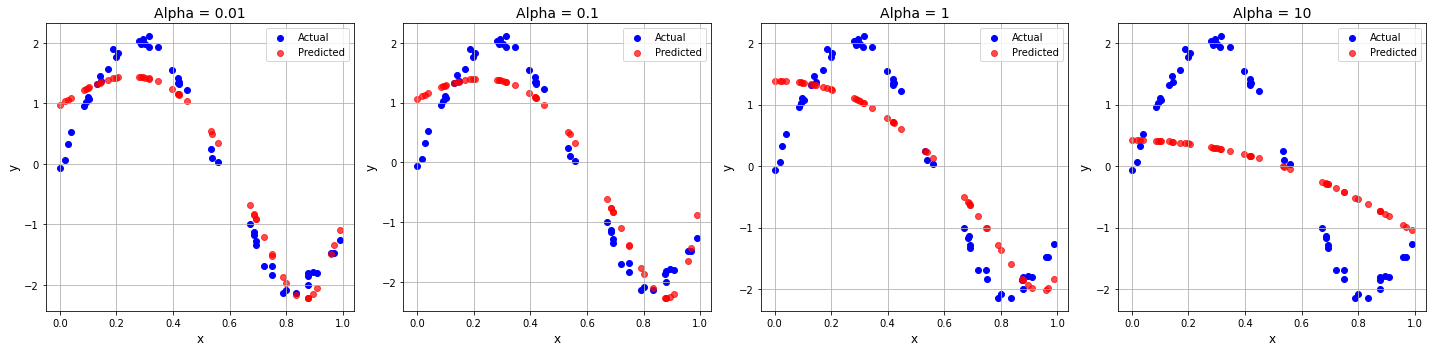

In [110]:
poly = PolynomialFeatures(degree=25, include_bias=False)
x_poly = poly.fit_transform(x[:, None]) 
alphas = [0.01, 0.1, 1, 10]

# Create subplots
fig, axes = plt.subplots(1, len(alphas), figsize=(20, 5)) 

def plot_lasso(alphas, axes):
    # Iterate over the alpha values and corresponding axes
    for ax, alpha in zip(axes.flat, alphas):
        modelL = LassoRegularization(alpha)
        modelL.fit(x_poly, y)
        y_pred = modelL.predict(x_poly)
        
        # Plot actual vs predicted data
        ax.scatter(x, y, color='blue', label='Actual')
        ax.scatter(x, y_pred, color='red', label='Predicted', alpha=0.7)
        
        # Customize the subplot
        ax.set_title(f'Alpha = {alpha}', fontsize=14)
        ax.set_xlabel('x', fontsize=12)
        ax.set_ylabel('y', fontsize=12)
        ax.grid(True)
        ax.legend()

# Call the plotting function
plot_lasso(alphas, axes)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [111]:
modelL = LassoRegularization(1e-5)
modelL.fit(x_poly, y)
y_pred = modelL.predict(x_poly)
print(modelL.coef_)
print(modelR.coef_)

[ 0.96243888  3.46839549 -4.62726089 -4.65640773 -2.85611124 -1.126647
  0.12999616  0.92760813  1.37005076  1.56009985  1.57930149  1.48748361
  1.32700101  1.12722441  0.90819449  0.68335603  0.46153206  0.24832721
  0.04711915 -0.14018606 -0.31285769 -0.47077617 -0.61426946 -0.74395591
 -0.8606234  -0.96514831]
[-1.02248252e-01  1.40587718e+01 -1.68421712e+01 -3.02113901e+01
  1.38879907e+01  2.56018072e+01  1.18766490e+01 -4.70002296e+00
 -1.32049559e+01 -1.28155400e+01 -6.95156216e+00  4.91543005e-01
  6.69473975e+00  1.02050279e+01  1.06943086e+01  8.58137177e+00
  4.68744767e+00 -2.10592941e-02 -4.60100352e+00 -8.22902269e+00
 -1.02464481e+01 -1.01703350e+01 -7.68417032e+00 -2.61780725e+00
  5.07706790e+00  1.53520306e+01]


## Robust regression

Linear least-squares estimates can behave badly when the error distribution is not normal, particularly when
the errors are heavy-tailed. One remedy is to remove influential observations from the least-squares fit. Another approach, termed robust regression, is to employ a fitting criterion that is not as vulnerable as least squares to unusual data.

The most common general method of robust regression is M-estimation, introduced by Huber (1964).

Fill in the following class:

In [112]:
class RobustRegression():
    # Class for robust linear regression:

    def __init__(self, potential, k,iterations=1000):
        self.coef_ = None
        self.potential_ = potential
        self.k_ = k
        self.iterations_ = iterations

    def weight_function(self, x, potential, k):
        """ Calculate weigth of point residual x.
    
        Parameters:
        -----------
        x: standarize by mad residual
        potential: name of the potential to use:
         "huber" or "bisquare"
        k: parameter of the potential function
        
        Returns:
        -----
        weight: weight corresponding to x 
        """
        assert potential in ["huber", "bisquare"], "Potential must be 'huber' or 'bisquare'"
        delta = k * np.median(np.abs(x - np.median(x)))  # Scale parameter
        if potential == "huber":
            weights = np.where(np.abs(x) <= delta, 1, delta / np.abs(x)) # Weight derivative of Huber potential
        elif potential == "bisquare":
        # Weights based on the derivative of Bisquare function
            weights = np.where(np.abs(x) <= delta, (1 - (x / delta) ** 2) ** 2, 0)

        return weights
    
    def fit(self, X, y):
        """ Fit the data (X, y).
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        y: (num_sampes, ) np.array
            Output vector
        
        Note:
        -----
        Updates self.coef_
        """
        #TODO:
        
        # Create a (num_samples, num_features+1) np.array X_aug whose first column 
        # is a column of all ones (so as to fit an intercept).
        num_samples, num_features = X.shape
        X_aug = np.ones((num_samples, num_features + 1))  # Initialize with ones
        X_aug[:, 1:] = X
        # Start with initial coefficients 
        self.coef_ = np.linalg.inv(X_aug.T.dot(X_aug)).dot(X_aug.T).dot(y)

        iteration = 0
        convergence = False
        while not convergence and iteration < self.iterations_:
            iteration += 1
            beta_old = self.coef_
            residuals = y - np.dot(X_aug,beta_old)
            standardized_residuals = np.abs(residuals)
            weight_k = np.diag(self.weight_function(standardized_residuals, self.potential_, self.k_)) 
            self.coef_ = np.linalg.inv(X_aug.T.dot(weight_k).dot(X_aug)).dot(X_aug.T).dot(weight_k).dot(y)
            convergence = np.inner(self.coef_ - beta_old, self.coef_ - beta_old) < 10**(-5)
        return self
            

        # Iteratively update coefficients by weighted least-squares until convergence
        
    def predict(self, X):
        """ Make predictions for data X.
    
        Parameters:
        -----------
        X: (num_samples, num_features) np.array
            Design matrix
        
        Returns:
        -----
        y_pred: (num_samples, ) np.array
            Predictions
        """
        num_samples, num_features= X.shape
        y_pred = [self.coef_[0]]*num_samples +  np.dot(X, self.coef_[1:])
        return y_pred

Try it in the following data with outliers coming from the heavy-tail error and compare with the performance of the other models:

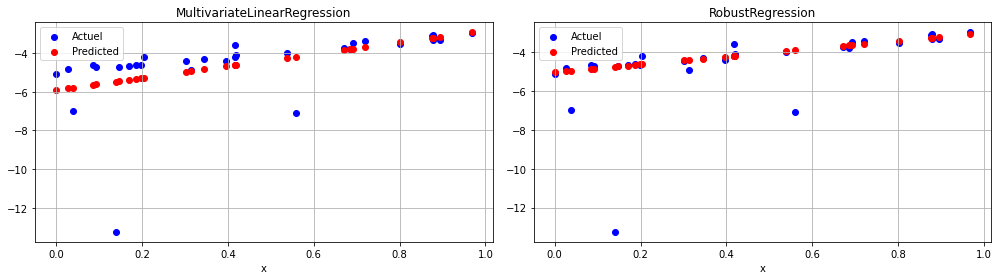

In [113]:
np.random.seed(300)
rng = np.random.RandomState(1)
x =  rng.rand(30)
y = 2 * x - 5 + 0.1* np.random.standard_cauchy(30)
# plt.scatter(x, y);

modelRob = RobustRegression("huber",   1.345)
modelRob.fit(x.reshape(-1, 1), y)
y_pred_rob = modelRob.predict(x.reshape(-1, 1))
ML = MultivariateLinearRegression()
ML.fit(x.reshape(-1, 1), y)
y_pred = ML.predict(x.reshape(-1, 1))

def scatter_plot(ax, x, y, y_pred, title):
    ax.scatter(x, y, color='blue', label='Actuel')
    ax.scatter(x, y_pred, color='red', label='Predicted')
    ax.set_title(title)
    ax.grid(True)
    ax.set_xlabel('x')
    ax.legend()

def plot_regression(x, y, y_pred, y_pred_rob):
    fig, axs = plt.subplots(1, 2, figsize=(14, 4))

    scatter_plot(axs[0], x, y, y_pred, 'MultivariateLinearRegression')
    scatter_plot(axs[1], x, y, y_pred_rob, 'RobustRegression')

    plt.tight_layout()
    plt.show()
plot_regression(x, y, y_pred, y_pred_rob)

## Bonus: Predicting Bicycle Traffic

As an example, let's take a look at whether we can predict the number of bicycle trips across Seattle's Fremont Bridge based on weather, season, and other factors.

In this section, we joinned the bike data with another dataset, and try to determine the extent to which weather and seasonal factors—temperature, precipitation, and daylight hours—affect the volume of bicycle traffic through this corridor.

As you may now, we should use time series techniques to analyze this dataset, instead, as a first simple approach, we will perform a multivariate linear regression to relate weather and other information to bicycle counts, in order to estimate how a change in any one of these parameters affects the number of riders on a given day.

Let's start by loading the dataset:

In [114]:
import pandas as pd
daily = pd.read_csv('data.csv', index_col='Date', parse_dates=True)
print(daily.head())
print("DataFrame size = ", daily.shape)

             Total  Mon  Tue  Wed  Thu  Fri  Sat  Sun  holiday  daylight_hrs  \
Date                                                                           
2012-10-03  3521.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0      0.0     11.277359   
2012-10-04  3475.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0      0.0     11.219142   
2012-10-05  3148.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0      0.0     11.161038   
2012-10-06  2006.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0      0.0     11.103056   
2012-10-07  2142.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0      0.0     11.045208   

            PRCP  Temp (C)  dry day    annual  
Date                                           
2012-10-03   0.0     13.35        1  0.000000  
2012-10-04   0.0     13.60        1  0.002740  
2012-10-05   0.0     15.30        1  0.005479  
2012-10-06   0.0     15.85        1  0.008219  
2012-10-07   0.0     15.85        1  0.010959  
DataFrame size =  (1064, 14)


With this in place, we can choose the columns to use, and fit a linear regression model to our data:

In [115]:
# Drop any rows with null values
daily.dropna(inplace=True)
X = daily[["Tue", "Wed", "Thu", "Fri", "Sat", "Sun", "holiday", "daylight_hrs", "PRCP",
           "Temp (C)", "dry day", "annual"]]
y = daily['Total']
model = MultivariateLinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
# Save it in the daily dataframe in a 'predicted' column
daily['predicted'] = y_pred

Finally, we can compare the total and predicted bicycle traffic visually:

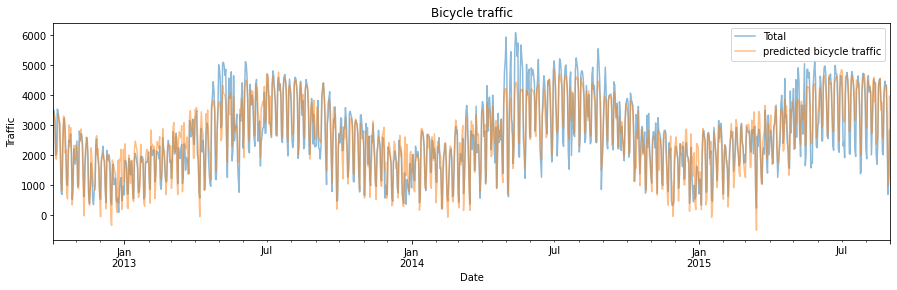

In [116]:
#daily[['Total', 'predicted']].plot(alpha=0.5);
ax= daily[['Total', 'predicted']].plot(alpha=0.5, ylabel='Traffic',
                                                       figsize=(15, 4), title="Bicycle traffic")
ax.legend(["Total", "predicted bicycle traffic"])

It is evident that we have missed some key features, especially during the summer time.
Either our features are not complete (i.e., people decide whether to ride to work based on more than just these) or there are some nonlinear relationships that we have failed to take into account (e.g., perhaps people ride less at both high and low temperatures).